#### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#### 2. Read the Dataset

In [2]:
df = pd.read_csv('wine-labeled.csv')

#### 3. Simple EDA for the Dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
features = df.columns.to_list()[:12]
X = df[features]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### 4. Scale the Data

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
np.round(X_scaled[:5, ], 2)

array([[0.3 , 0.41, 0.  , 0.02, 0.11, 0.03, 0.06, 0.21, 0.61, 0.19, 0.2 ,
        0.33],
       [0.33, 0.53, 0.  , 0.03, 0.15, 0.08, 0.14, 0.19, 0.37, 0.26, 0.26,
        0.33],
       [0.33, 0.45, 0.02, 0.03, 0.14, 0.05, 0.11, 0.19, 0.42, 0.24, 0.26,
        0.33],
       [0.61, 0.13, 0.34, 0.02, 0.11, 0.06, 0.12, 0.21, 0.34, 0.2 , 0.26,
        0.5 ],
       [0.3 , 0.41, 0.  , 0.02, 0.11, 0.03, 0.06, 0.21, 0.61, 0.19, 0.2 ,
        0.33]])

#### 5. Apply the PCA on the Dataset  and Visualize the Data

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [11]:
pca_names=['PCA_{}'.format(k) for k in range(1,4)]
df_pca = pd.DataFrame(X_pca, columns=pca_names)
df_pca['type'] = df['type']
df_pca.head()

,PCA_1,PCA_2,PCA_3,type
0,-0.100585,0.422175,-0.180641,red
1,-0.117043,0.371329,-0.031691,red
2,-0.098872,0.364301,-0.039112,red
3,-0.060295,0.126343,0.331730,red
4,-0.100585,0.422175,-0.180641,red


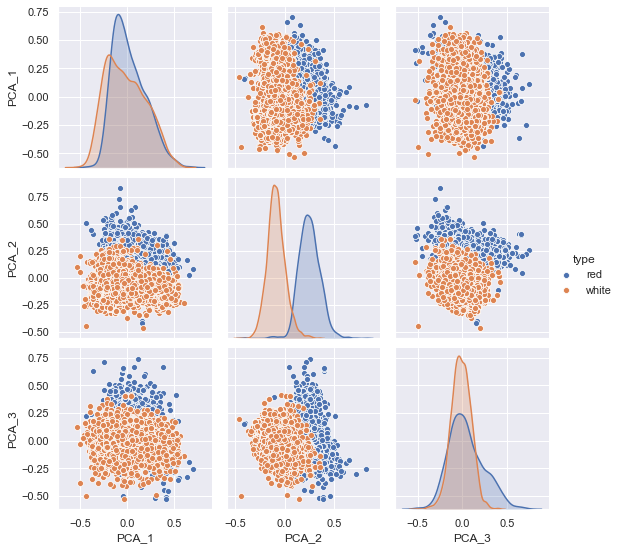

In [12]:
sns.pairplot(df_pca, hue='type')
plt.show()

#### 6. Run 10 Iterations of Clustering to Find the Optimal Cluster Size

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_clusters = 10
n_clusters = np.arange(2, max_clusters)
scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    score = silhouette_score(X_pca, model.labels_)
    scores.append(score)


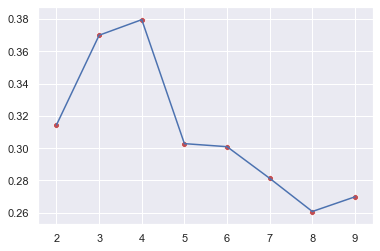

In [14]:
sns.lineplot(x=n_clusters, y=scores)
sns.scatterplot(x=n_clusters, y=scores, color='r')
plt.show()

#### 7. Visualize the Data with "Optimal" Cluster Size

In [15]:
model = KMeans(n_clusters=4)
model.fit(X_pca)
labels = model.labels_

In [16]:
df_pca['cluster'] = labels.reshape(-1,1)

In [17]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PCA_1    6497 non-null   float64
 1   PCA_2    6497 non-null   float64
 2   PCA_3    6497 non-null   float64
 3   type     6497 non-null   object 
 4   cluster  6497 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 228.5+ KB


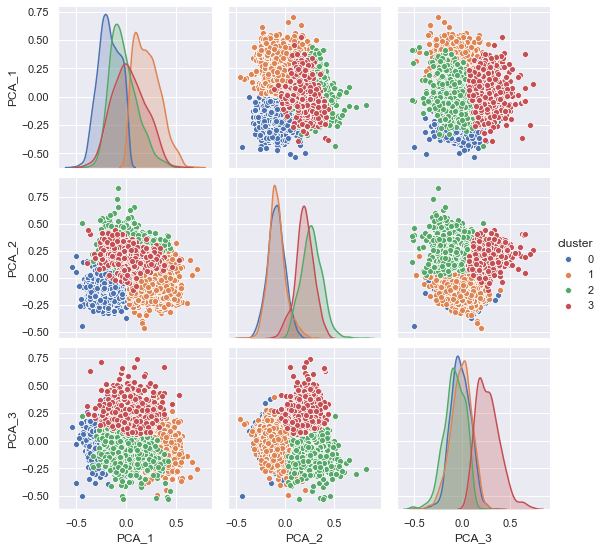

In [18]:
sns.pairplot(df_pca, hue='cluster')
plt.show()